In [2]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import os
import sys
import pickle
from tqdm import tqdm
sys.path.append('/home/jiarong/research/postprocessing/functions/')
from TurStat import TurStat

In [3]:
# Assemble the data in the form of x, y, z, t, quantities
os.chdir('/home/jiarong/research/projects/turbulence/preliminary_cluster/stopforcing_restore_second')
(fieldset, tset, ptnum) = pickle.load( open( "ensemble", "rb" ) )

In [4]:
Stat1 = TurStat(fieldset, tset)

not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped: 10404
not stripped: 16384
stripped

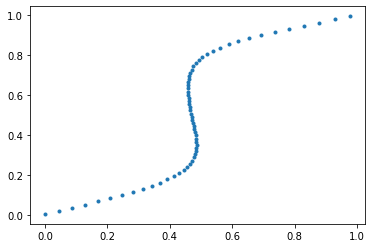

In [5]:
Stat1.ensemble_aver()
from Slicing import Slicing
slicer_en_aver = Slicing(Stat1.field_en_aver, dimension = 3)

# Still needs testing
slicer_en_aver.get_grid_set('y')
ux_aver = np.zeros(len(slicer_en_aver.grid_set))
for j, y in enumerate(slicer_en_aver.grid_set):
    ux_aver[j], fluc, number = slicer_en_aver.statistics('y', y, header = 'u.x')
    print("not stripped: %g" %number)
    ux_aver[j], fluc, number = slicer_en_aver.statistics('y', y, header= 'u.x', stripping = True,
                                                        strip_range = [[-0.8, 0.8], [-0.8, 0.8]])
    print("stripped: %g" %number)
    
#     ux_aver[j], __, __ = filename.rpartition('.')
plt.plot(ux_aver, slicer_en_aver.grid_set, '.')

In [6]:
y = np.array(slicer_en_aver.grid_set)
u_star = ((ux_aver[1] - ux_aver[0]) / (y[1] - y[0]) * 4.1545e-5) ** 0.5
u_plus = ux_aver/u_star
y_plus = y*u_star/4.1545e-5

In [7]:
# Compute fluctuation <uw>
from Slicing import Slicing
def uv(field):
    '''
    One of many function that define desirable field. Use with function ensemble_aver_quantity.
    Takes in a field. Return a quantity of that field, be it a scalar or an array.
    In this case, returns the value of uv at different y.
    '''
    # Add a column of uv
    field['uv'] = field['u.x'].multiply(field['u.y'])
    slicer = Slicing(field, 3)
    slicer.get_grid_set('y')
    a = np.zeros(len(slicer.grid_set))
    for i, y in enumerate(slicer.grid_set):
        # Slice through y direction
        (aver,fluc,number) = slicer.statistics('y', y, clearance = 1e-8, header = 'uv')
        a[i] = aver
    return a
uv_array1 = Stat1.ensemble_aver_quantity(uv)

100%|██████████| 50/50 [00:11<00:00,  4.18it/s]


In [7]:
def uv_stripping(field):
    '''
    One of many function that define desirable field. Use with function ensemble_aver_quantity.
    Takes in a field. Return a quantity of that field, be it a scalar or an array.
    In this case, returns the value of uv at different y.
    '''
    # Add a column of uv
    field['uv'] = field['u.x'].multiply(field['u.y'])
    slicer = Slicing(field, 3)
    slicer.get_grid_set('y')
    a = np.zeros(len(slicer.grid_set))
    area = [[-0.9, 0.9], [-0.9, 0.9]]
    for i, y in enumerate(slicer.grid_set):
        # Slice through y direction
        (aver,fluc,number) = slicer.statistics('y', y, clearance = 1e-8, header = 'uv', stripping = True,
                                                        strip_range = area)
        a[i] = aver
    return a
uv_array2 = Stat1.ensemble_aver_quantity(uv_stripping)

100%|██████████| 50/50 [00:16<00:00,  3.09it/s]


In [8]:
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

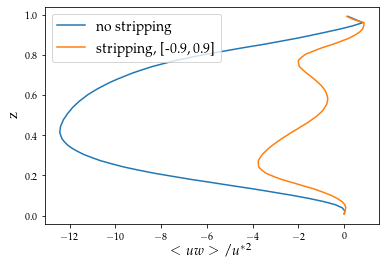

In [27]:
plt.plot(uv_array1/(u_star**2), slicer_en_aver.grid_set, label = 'no stripping')
plt.plot(uv_array2/(u_star**2), slicer_en_aver.grid_set, label = 'stripping, [-0.9, 0.9]')
plt.xlabel(r'$<uw>/u^{*2}$', fontsize = 14)
plt.ylabel('z', fontsize = 14)
plt.legend(fontsize = 14)

In [13]:
def u(field):
    '''
    One of many function that define desirable field. Use with function ensemble_aver_quantity.
    Takes in a field. Return a quantity of that field, be it a scalar or an array.
    In this case, returns the value of uv at different y.
    '''
    slicer = Slicing(field, 3)
    slicer.get_grid_set('y')
    a = np.zeros(len(slicer.grid_set))
    for i, y in enumerate(slicer.grid_set):
        # Slice through y direction
        (aver,fluc,number) = slicer.statistics('y', y, clearance = 1e-8, header = 'u.x')
        a[i] = aver
    return a
u_array = Stat1.ensemble_aver_quantity(u)
tau1 = np.gradient(u_array, slicer_en_aver.grid_set)

100%|██████████| 50/50 [00:11<00:00,  4.76it/s]


In [14]:
def u_stripping(field):
    '''
    One of many function that define desirable field. Use with function ensemble_aver_quantity.
    Takes in a field. Return a quantity of that field, be it a scalar or an array.
    In this case, returns the value of uv at different y.
    '''
    slicer = Slicing(field, 3)
    slicer.get_grid_set('y')
    a = np.zeros(len(slicer.grid_set))
    for i, y in enumerate(slicer.grid_set):
        # Slice through y direction
        (aver,fluc,number) = slicer.statistics('y', y, clearance = 1e-8, header = 'u.x', stripping = True,
                                                        strip_range = [[-0.8, 0.8], [-0.8, 0.8]])
        a[i] = aver
    return a
u_array = Stat1.ensemble_aver_quantity(u_stripping)
tau2 = np.gradient(u_array, slicer_en_aver.grid_set)

100%|██████████| 50/50 [00:15<00:00,  3.24it/s]


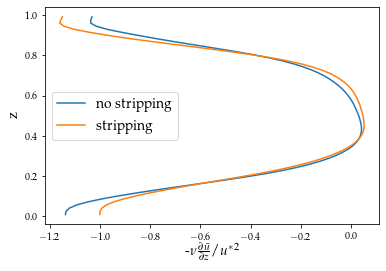

In [30]:
plt.plot(-tau1*4.1545e-5/(u_star**2), slicer_en_aver.grid_set, label = 'no stripping')
plt.plot(-tau2*4.1545e-5/(u_star**2), slicer_en_aver.grid_set, label = 'stripping')
plt.xlabel(r'-$\nu\frac{\partial \bar{u}}{\partial z} / u^{*2}$', fontsize = 14)
plt.ylabel('z', fontsize = 14)
plt.legend(fontsize = 14)

### Fit the Law of Wall
$\nu_{a}$ = 16.6/RE  
RE = 4000:  $\nu$ = 4.1545e-4  
RE = 40000:  $\nu$ = 4.1545e-5  
$u^{*2} = \nu \frac{\partial U}{\partial y}$  = 0.0113, the viscous velocity scale  
$\delta_{\nu} = \nu / u^{*}$ = 4.1545e-5/0.0113 = 0.003, the viscous length scale

In [8]:
(ux_aver[1] - ux_aver[0]) / (y[1] - y[0])

2.713774028316498

In [9]:
y = np.array(slicer_en_aver.grid_set)
u_star = ((ux_aver[1] - ux_aver[0]) / (y[1] - y[0]) * 4.1545e-5) ** 0.5
u_plus = ux_aver/u_star
y_plus = y*u_star/4.1545e-5

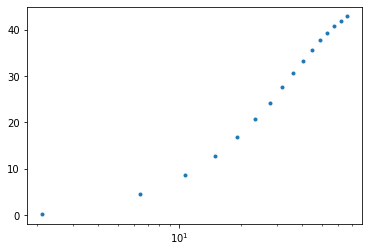

In [11]:
plt.plot(y_plus[0:16], u_plus[0:16], '.')
plt.xscale('log')

0.045543225208597195 -47.96033541035282


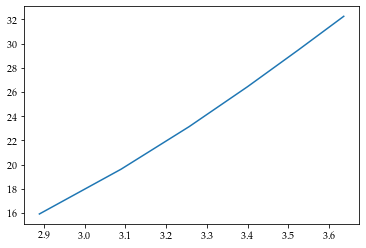

In [21]:
y = y_plus[4:10]
u = u_plus[4:10]
plt.plot(np.log(y), u)
a, b = np.polyfit(np.log(y), u, 1)
print(1/a, b)

0.2331430319365023 0.7831900389771522


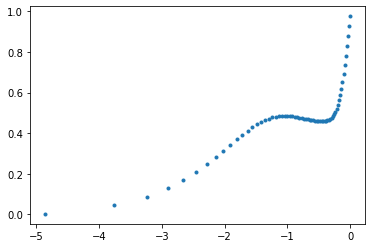

In [15]:
plt.plot(np.log(y), ux_aver, '.')
a, b = np.polyfit(np.log(y)[4:10], ux_aver[4:10], 1)
print(a, b)

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import matplotlib
SMALL_SIZE = 8
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [33]:
0.136*2*3.14

0.8540800000000001

In [34]:
u_star

0.010618085609299301